In [62]:
import pandas as pd
import plotly.express as px
import joypy
import numpy as np

In [63]:
models = ['XGBoost', 'CatBoost', 'LightGBM']
df = pd.DataFrame(columns=['Algorithm', 'F1', 'Dataset', 'Model'])
list_df = []
for model in models:
    heart_ga = pd.read_csv(f'./{model}/final_results_heart/FINAL_RESULT_GA_HEART.csv')[['Algorithm', 'F1']][:30]
    heart_pso = pd.read_csv(f'./{model}/final_results_heart/FINAL_RESULT_PSO_HEART.csv')[['Algorithm', 'F1']][:30]
    heart_optuna = pd.read_csv(f'./{model}/final_results_heart/FINAL_RESULT_OPTUNA_HEART.csv')[['Algorithm', 'F1']][:30]
    heart_rs = pd.read_csv(f'./{model}/final_results_heart/FINAL_RESULT_RS_HEART.csv')[['Algorithm', 'F1']][:30]
    fruit_ga = pd.read_csv(f'./{model}/final_results_fruit/FINAL_RESULT_GA_FRUIT.csv')[['Algorithm', 'F1']][:30]
    fruit_pso = pd.read_csv(f'./{model}/final_results_fruit/FINAL_RESULT_PSO_FRUIT.csv')[['Algorithm', 'F1']][:30]
    fruit_optuna = pd.read_csv(f'./{model}/final_results_fruit/FINAL_RESULT_OPTUNA_FRUIT.csv')[['Algorithm', 'F1']][:30]
    fruit_rs = pd.read_csv(f'./{model}/final_results_fruit/FINAL_RESULT_RS_FRUIT.csv')[['Algorithm', 'F1']][:30]
    wine_ga = pd.read_csv(f'./{model}/final_results_wine/FINAL_RESULT_GA_WINE.csv')[['Algorithm', 'F1']][:30]
    wine_pso = pd.read_csv(f'./{model}/final_results_wine/FINAL_RESULT_PSO_WINE.csv')[['Algorithm', 'F1']][:30]
    wine_optuna = pd.read_csv(f'./{model}/final_results_wine/FINAL_RESULT_OPTUNA_WINE.csv')[['Algorithm', 'F1']][:30]
    wine_rs = pd.read_csv(f'./{model}/final_results_wine/FINAL_RESULT_RS_WINE.csv')[['Algorithm', 'F1']][:30]

    heart_ga['Dataset'] = 'heart'
    heart_pso['Dataset'] = 'heart'
    heart_optuna['Dataset'] = 'heart'
    heart_rs['Dataset'] = 'heart'
    fruit_ga['Dataset'] = 'Fruit'
    fruit_pso['Dataset'] = 'Fruit'
    fruit_optuna['Dataset'] = 'Fruit'
    fruit_rs['Dataset'] = 'Fruit'
    wine_ga['Dataset'] = 'Wine'
    wine_pso['Dataset'] = 'Wine'
    wine_optuna['Dataset'] = 'Wine'
    wine_rs['Dataset'] = 'Wine'

    temp_df = pd.concat([
                    heart_ga,
                    heart_pso,
                    heart_optuna,
                    heart_rs,
                    fruit_ga,
                    fruit_pso,
                    fruit_optuna,
                    fruit_rs,
                    wine_ga,
                    wine_pso,
                    wine_optuna,
                    wine_rs
                    ], axis=0)
    
    #temp_df['Model'] = model
    temp_df.rename(columns={'F1': model}, inplace=True)

    list_df.append(temp_df);
    #df = pd.concat([temp_df, df], axis=1)


In [64]:
result_left = pd.merge(list_df[0], list_df[1], on=['Algorithm', 'Dataset'], how='left')
result_left = pd.merge(result_left, list_df[2], on=['Algorithm', 'Dataset'], how='left')
df = result_left 

In [65]:
df['alg_dataset'] =   df['Dataset'] + " " + df['Algorithm']
df

,Algorithm,XGBoost,Dataset,CatBoost,LightGBM,alg_dataset
0,GA,0.899555,heart,0.897171,0.898407,heart GA
1,GA,0.899555,heart,0.897171,0.900043,heart GA
2,GA,0.899555,heart,0.897171,0.902071,heart GA
3,GA,0.899555,heart,0.897171,0.898242,heart GA
4,GA,0.899555,heart,0.897171,0.902330,heart GA
...,...,...,...,...,...,...
323995,Random Search,0.798432,Wine,0.572559,0.768302,Wine Random Search
323996,Random Search,0.798432,Wine,0.572559,0.759991,Wine Random Search
323997,Random Search,0.798432,Wine,0.572559,0.753987,Wine Random Search
323998,Random Search,0.798432,Wine,0.572559,0.767169,Wine Random Search


In [94]:
medians = df.groupby('alg_dataset')[['XGBoost', 'LightGBM', 'CatBoost']].quantile(0.5).values
medians

array([[0.90908029, 0.91085017, 0.08509013],
       [0.90870038, 0.89880922, 0.87518501],
       [0.90262118, 0.85810638, 0.08450582],
       [0.90173649, 0.89518444, 0.78141147],
       [0.81868014, 0.80392582, 0.08652501],
       [0.8187548 , 0.80195718, 0.63712068],
       [0.82088351, 0.67900713, 0.0806354 ],
       [0.80503018, 0.75379212, 0.54377841],
       [0.8994889 , 0.89895128, 0.89767985],
       [0.89739041, 0.89727619, 0.89577497],
       [0.88345452, 0.87379727, 0.8761065 ],
       [0.89048109, 0.88922994, 0.89321194]])

C:\Users\Felps\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joypy\joyplot.py:307: RuntimeWarning: invalid value encountered in divide
  y = lpdf/lpdf.sum()


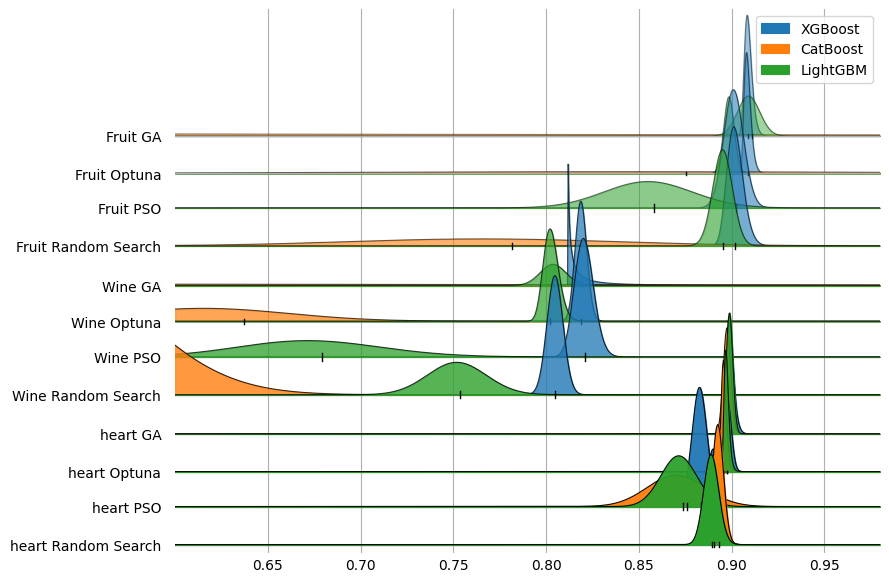

In [115]:
fig, axes = joypy.joyplot(df, 
              by = 'alg_dataset',
              ylim='own',  
              #range_style='own', 
              hist=False, 
              overlap=2,             
              linewidth=0.8,
              kind = 'lognorm',
              tails = 0.5,
              fade=True,
              grid=True, 
              #normalize = True, 
              x_range=np.linspace(0.6, 0.98, 10),
              figsize=(9,6),
              bins=15,
              legend=True);

# Specify y-limit for the horizontal lines
y_limit = 0.001  # Adjust this value based on your requirements

# Add horizontal line at the median of each group
for ax, median in zip(axes, medians):
    ax.plot([median, median], [-y_limit, y_limit], color='black', linestyle='-', linewidth=1, zorder=15)
    #text = median[0]
    #text = f'{text:.2f}'
    #ax.text(float(text), -y_limit * 5, text, ha='center', va='bottom', color='black', fontsize=8, zorder=20)
    #text = median[1]
    #text = f'{text:.2f}'
    #ax.text(float(text), -y_limit * 5, text, ha='center', va='bottom', color='black', fontsize=8, zorder=20)
    #text = median[2]
    #text = f'{text:.2f}'
    #ax.text(float(text), -y_limit * 5, text, ha='center', va='bottom', color='black', fontsize=8, zorder=20)
    #ax.plot([median, median], [-y_limit, y_limit], color='black', linestyle='-', linewidth=1, zorder=15)

# Show the plot

In [133]:
models = ['XGBoost', 'CatBoost', 'LightGBM']
df = pd.DataFrame(columns=['Algorithm', 'F1', 'Dataset', 'Model'])
list_df = []
for model in models:
    heart_ga = pd.read_csv(f'./{model}/final_results_heart/FINAL_RESULT_GA_HEART.csv')[['Algorithm', 'F1']][:30]
    heart_pso = pd.read_csv(f'./{model}/final_results_heart/FINAL_RESULT_PSO_HEART.csv')[['Algorithm', 'F1']][:30]
    heart_optuna = pd.read_csv(f'./{model}/final_results_heart/FINAL_RESULT_OPTUNA_HEART.csv')[['Algorithm', 'F1']][:30]
    heart_rs = pd.read_csv(f'./{model}/final_results_heart/FINAL_RESULT_RS_HEART.csv')[['Algorithm', 'F1']][:30]
    fruit_ga = pd.read_csv(f'./{model}/final_results_fruit/FINAL_RESULT_GA_FRUIT.csv')[['Algorithm', 'F1']][:30]
    fruit_pso = pd.read_csv(f'./{model}/final_results_fruit/FINAL_RESULT_PSO_FRUIT.csv')[['Algorithm', 'F1']][:30]
    fruit_optuna = pd.read_csv(f'./{model}/final_results_fruit/FINAL_RESULT_OPTUNA_FRUIT.csv')[['Algorithm', 'F1']][:30]
    fruit_rs = pd.read_csv(f'./{model}/final_results_fruit/FINAL_RESULT_RS_FRUIT.csv')[['Algorithm', 'F1']][:30]
    wine_ga = pd.read_csv(f'./{model}/final_results_wine/FINAL_RESULT_GA_WINE.csv')[['Algorithm', 'F1']][:30]
    wine_pso = pd.read_csv(f'./{model}/final_results_wine/FINAL_RESULT_PSO_WINE.csv')[['Algorithm', 'F1']][:30]
    wine_optuna = pd.read_csv(f'./{model}/final_results_wine/FINAL_RESULT_OPTUNA_WINE.csv')[['Algorithm', 'F1']][:30]
    wine_rs = pd.read_csv(f'./{model}/final_results_wine/FINAL_RESULT_RS_WINE.csv')[['Algorithm', 'F1']][:30]

    heart_ga['Dataset'] = 'heart'
    heart_pso['Dataset'] = 'heart'
    heart_optuna['Dataset'] = 'heart'
    heart_rs['Dataset'] = 'heart'
    fruit_ga['Dataset'] = 'Fruit'
    fruit_pso['Dataset'] = 'Fruit'
    fruit_optuna['Dataset'] = 'Fruit'
    fruit_rs['Dataset'] = 'Fruit'
    wine_ga['Dataset'] = 'Wine'
    wine_pso['Dataset'] = 'Wine'
    wine_optuna['Dataset'] = 'Wine'
    wine_rs['Dataset'] = 'Wine'

    temp_df = pd.concat([
                    heart_ga,
                    heart_pso,
                    heart_optuna,
                    heart_rs,
                    fruit_ga,
                    fruit_pso,
                    fruit_optuna,
                    fruit_rs,
                    wine_ga,
                    wine_pso,
                    wine_optuna,
                    wine_rs
                    ], axis=0)
    
    temp_df['Model'] = model
    #temp_df.rename(columns={'F1': model}, inplace=True)

    #list_df.append(temp_df);
    df = pd.concat([temp_df, df], axis=0)

df

,Algorithm,F1,Dataset,Model
0,GA,0.898407,heart,LightGBM
1,GA,0.900043,heart,LightGBM
2,GA,0.902071,heart,LightGBM
3,GA,0.898242,heart,LightGBM
4,GA,0.902330,heart,LightGBM
...,...,...,...,...
25,Random Search,0.807859,Wine,XGBoost
26,Random Search,0.808474,Wine,XGBoost
27,Random Search,0.797792,Wine,XGBoost
28,Random Search,0.803052,Wine,XGBoost


In [135]:
# Pivot the DataFrame
pivot_df = df[df['Dataset'] == 'Wine'].pivot(index='Dataset', columns='Algorithm', values='F1').reset_index()

# Display the pivoted DataFrame
print(pivot_df)

ValueError: Index contains duplicate entries, cannot reshape

In [124]:
df['model_dataset'] =   df['Dataset'] + " " + df['Model']
df

,Algorithm,F1,Dataset,Model,model_dataset
0,GA,0.898407,heart,LightGBM,heart LightGBM
1,GA,0.900043,heart,LightGBM,heart LightGBM
2,GA,0.902071,heart,LightGBM,heart LightGBM
3,GA,0.898242,heart,LightGBM,heart LightGBM
4,GA,0.902330,heart,LightGBM,heart LightGBM
...,...,...,...,...,...
25,Random Search,0.807859,Wine,XGBoost,Wine XGBoost
26,Random Search,0.808474,Wine,XGBoost,Wine XGBoost
27,Random Search,0.797792,Wine,XGBoost,Wine XGBoost
28,Random Search,0.803052,Wine,XGBoost,Wine XGBoost


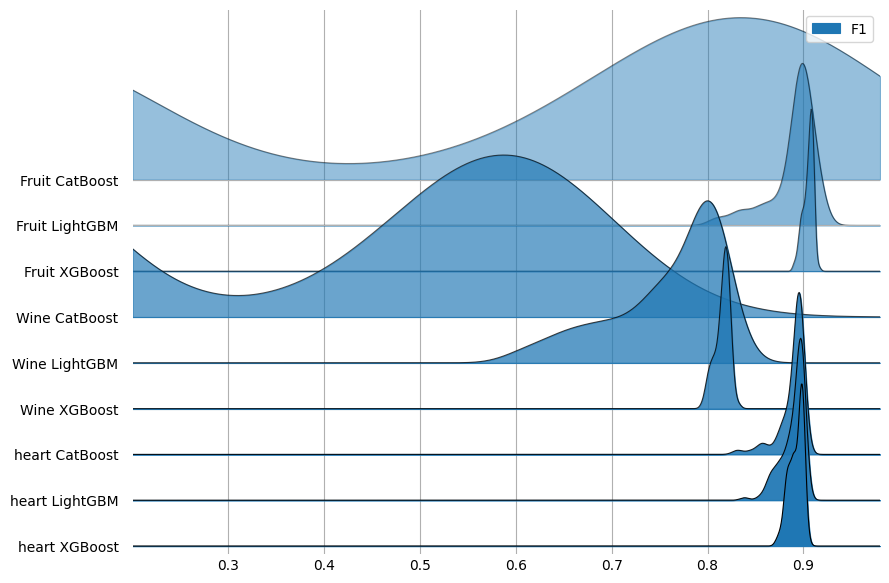

In [127]:
fig, axes = joypy.joyplot(df, 
              by = 'model_dataset',
              ylim='own',  
              #range_style='own', 
              hist=False, 
              overlap=2,             
              linewidth=0.8,
              #kind = 'lognorm',
              tails = 0.5,
              fade=True,
              grid=True, 
              #normalize = True, 
              x_range=np.linspace(0.2, 0.98, 10),
              figsize=(9,6),
              bins=15,
              legend=True);